In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Rose wine sales

In [2]:
df = pd.read_csv('Rose.csv',parse_dates=['YearMonth'], index_col='YearMonth')
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [3]:
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


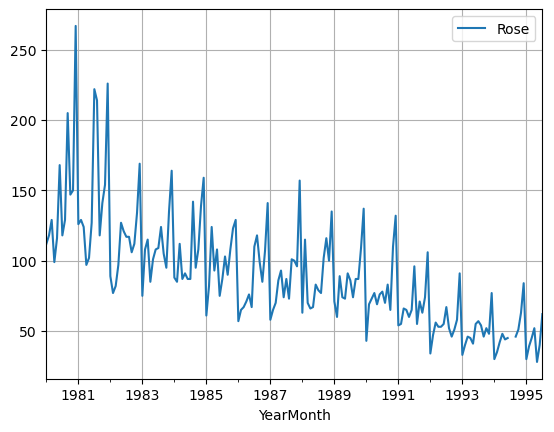

In [4]:
df.plot()
plt.grid()

In [5]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [6]:
df.isnull().sum()

Rose    2
dtype: int64

In [7]:
df.loc['1994']

,Rose
YearMonth,
1994-01-01,30.0
1994-02-01,35.0
1994-03-01,42.0
1994-04-01,48.0
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,NaN
1994-08-01,NaN
1994-09-01,46.0


In [16]:
df.interpolate(method='spline', inplace=False, order=1).loc['1994'].round(2)

,Rose
YearMonth,
1994-01-01,30.00
1994-02-01,35.00
1994-03-01,42.00
1994-04-01,48.00
1994-05-01,44.00
1994-06-01,45.00
1994-07-01,46.15
1994-08-01,47.21
1994-09-01,46.00


In [17]:
df.isnull().sum()

Rose    0
dtype: int64

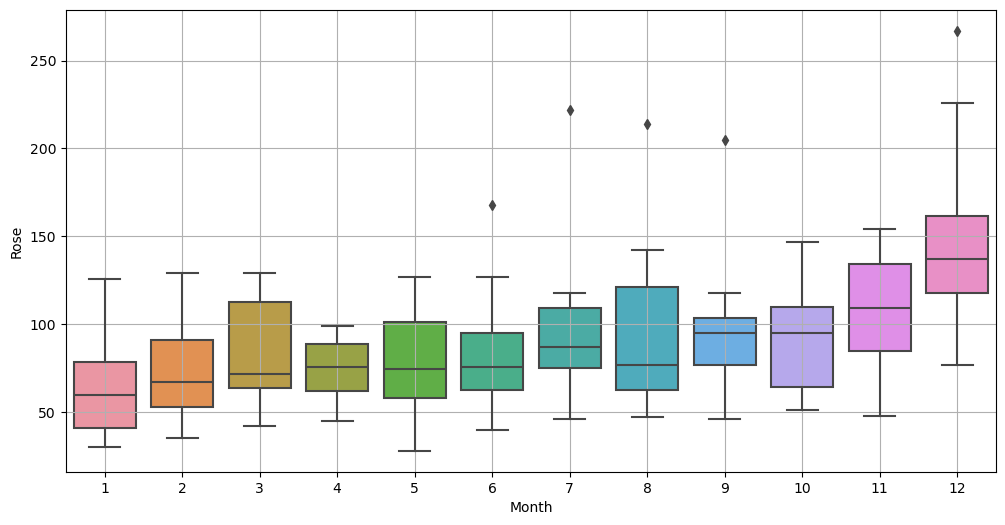

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.index.month, y=df['Rose']);
plt.xlabel('Month')
plt.grid()

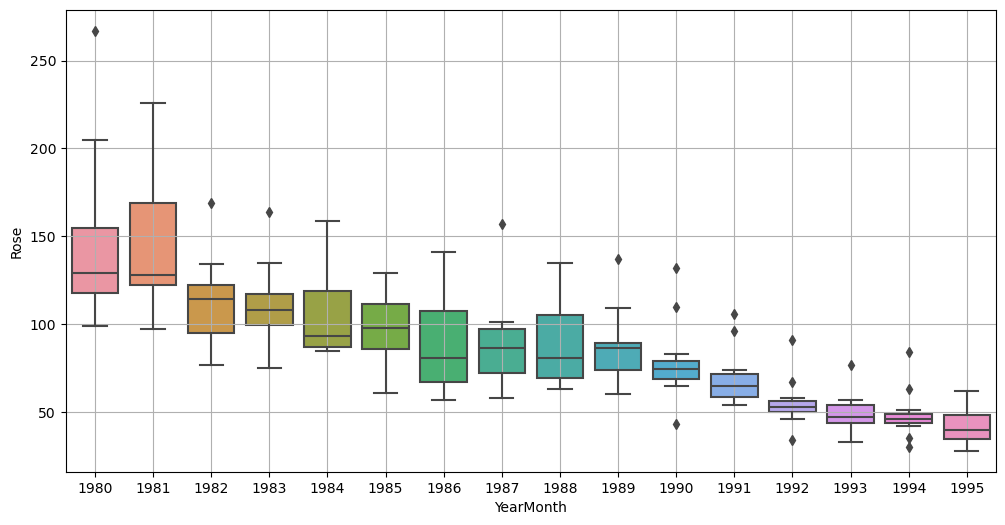

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.index.year, y=df['Rose']);
plt.grid()

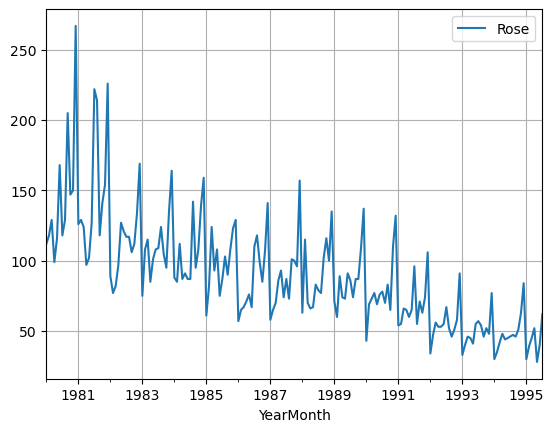

In [20]:
df.plot()
plt.grid()

## ECDF

In [21]:
from statsmodels.distributions.empirical_distribution import ECDF

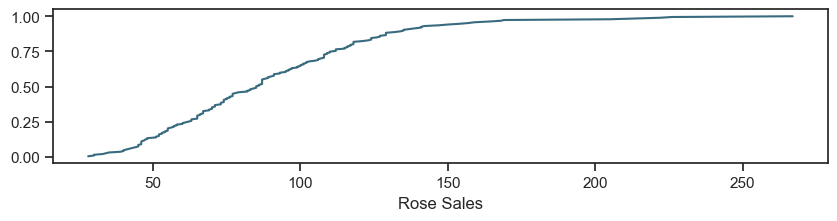

In [22]:
sns.set(style = "ticks")
c = '#386B7F'
plt.figure(figsize = (10, 2))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Rose Sales');

## Decomposition

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

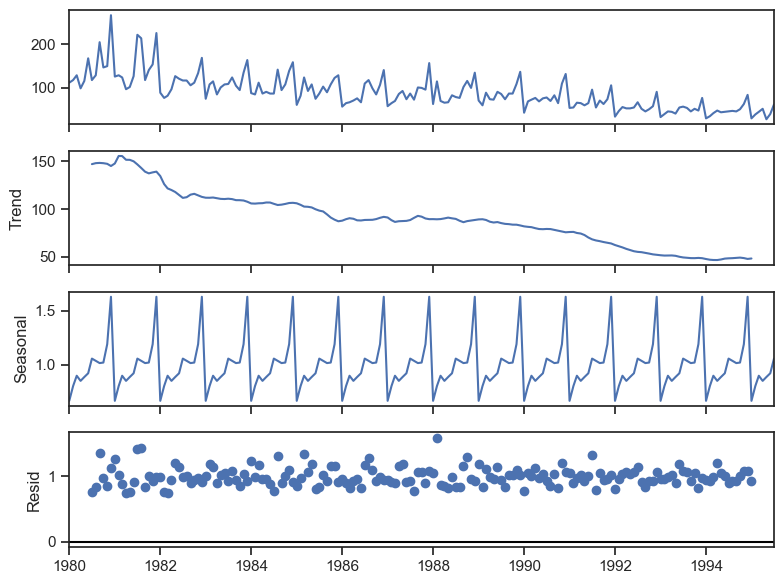

In [24]:
decomposition = seasonal_decompose(df, model='multiplicative')
rcParams['figure.figsize'] = 8, 6
decomposition.plot()
plt.show()

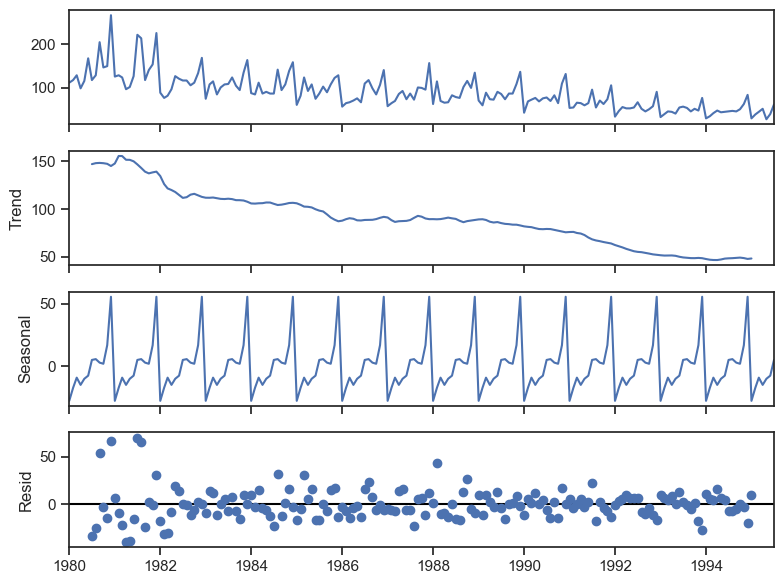

In [25]:
decomposition = seasonal_decompose(df, model='additive')
rcParams['figure.figsize'] = 8, 6
decomposition.plot()
plt.show()

## Splitting the data

In [26]:
from IPython.display import display

In [27]:
Train = df[df.index < '1991-01-01']
Test = df[df.index >= '1991-01-01']

In [28]:
display(Train)

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0


In [29]:
display(Test)

,Rose
YearMonth,
1991-01-01,54.000000
1991-02-01,55.000000
1991-03-01,66.000000
1991-04-01,65.000000
1991-05-01,60.000000
1991-06-01,65.000000
1991-07-01,96.000000
1991-08-01,55.000000
1991-09-01,71.000000


## Simple Exponential Smoothing

In [30]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt
from sklearn.metrics import mean_squared_error

In [31]:
model_SES = SimpleExpSmoothing(Train, initialization_method='estimated')

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
model_SES_fit = model_SES.fit(optimized=True)

In [33]:
model_SES_fit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [34]:
model_SES_predict = model_SES_fit.forecast(steps=len(Test))

In [35]:
model_SES_predict

1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
1991-06-01    87.104997
1991-07-01    87.104997
1991-08-01    87.104997
1991-09-01    87.104997
1991-10-01    87.104997
1991-11-01    87.104997
1991-12-01    87.104997
1992-01-01    87.104997
1992-02-01    87.104997
1992-03-01    87.104997
1992-04-01    87.104997
1992-05-01    87.104997
1992-06-01    87.104997
1992-07-01    87.104997
1992-08-01    87.104997
1992-09-01    87.104997
1992-10-01    87.104997
1992-11-01    87.104997
1992-12-01    87.104997
1993-01-01    87.104997
1993-02-01    87.104997
1993-03-01    87.104997
1993-04-01    87.104997
1993-05-01    87.104997
1993-06-01    87.104997
1993-07-01    87.104997
1993-08-01    87.104997
1993-09-01    87.104997
1993-10-01    87.104997
1993-11-01    87.104997
1993-12-01    87.104997
1994-01-01    87.104997
1994-02-01    87.104997
1994-03-01    87.104997
1994-04-01    87.104997
1994-05-01    87.104997
1994-06-01    87

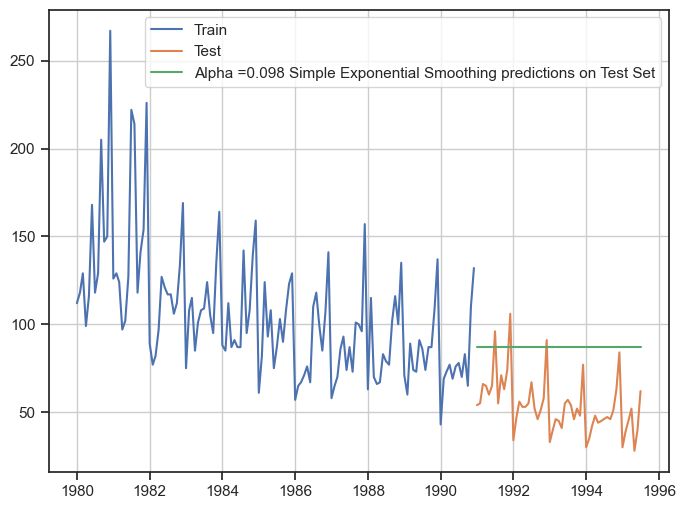

In [36]:
plt.plot(Train, label='Train')
plt.plot(Test, label='Test')
plt.plot(model_SES_predict, label = 'Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')
plt.legend()
plt.grid()
plt.show()

In [37]:
# RMSE for SES model

In [38]:
print('SES_model :', mean_squared_error(Test.values, model_SES_predict.values, squared=False))

SES_model : 36.74840201882501


In [39]:
# Results

In [40]:
resultsDF1 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test.values, model_SES_predict.values, squared=False)}, index=['SES_model'])
resultsDF1

,Test_RMSE
SES_model,36.748402


## Double Exponential Smoothing

In [41]:
model_DES = Holt(Train, initialization_method='estimated')

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
model_DES_fit = model_DES.fit()
model_DES_fit

In [43]:
model_DES_fit.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 1.6610391146660035e-10,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81553690867275,
 'initial_trend': -0.4943781897068274,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [44]:
model_DES_predict = model_DES_fit.forecast(steps=len(Test))
model_DES_predict

1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
1991-06-01    69.591347
1991-07-01    69.096969
1991-08-01    68.602590
1991-09-01    68.108212
1991-10-01    67.613834
1991-11-01    67.119456
1991-12-01    66.625078
1992-01-01    66.130699
1992-02-01    65.636321
1992-03-01    65.141943
1992-04-01    64.647565
1992-05-01    64.153187
1992-06-01    63.658808
1992-07-01    63.164430
1992-08-01    62.670052
1992-09-01    62.175674
1992-10-01    61.681296
1992-11-01    61.186918
1992-12-01    60.692539
1993-01-01    60.198161
1993-02-01    59.703783
1993-03-01    59.209405
1993-04-01    58.715027
1993-05-01    58.220648
1993-06-01    57.726270
1993-07-01    57.231892
1993-08-01    56.737514
1993-09-01    56.243136
1993-10-01    55.748757
1993-11-01    55.254379
1993-12-01    54.760001
1994-01-01    54.265623
1994-02-01    53.771245
1994-03-01    53.276866
1994-04-01    52.782488
1994-05-01    52.288110
1994-06-01    51

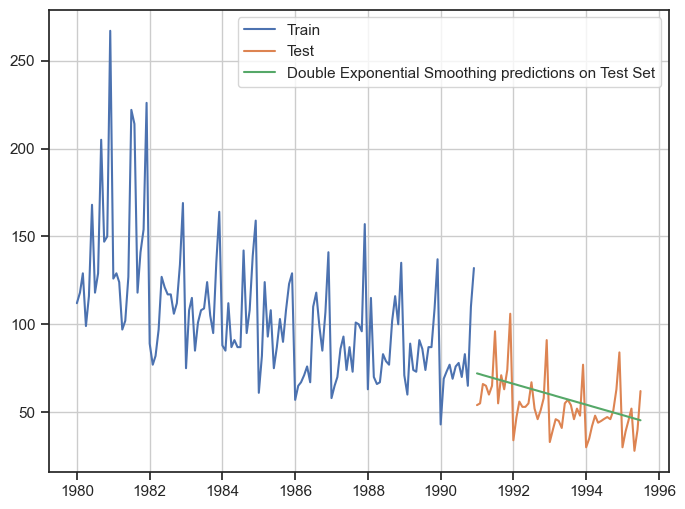

In [45]:
plt.plot(Train, label='Train')
plt.plot(Test, label='Test')
plt.plot(model_DES_predict, label = 'Double Exponential Smoothing predictions on Test Set')
plt.legend()
plt.grid()
plt.show()

In [46]:
# RMSE for DES model

In [47]:
print('DES_model :', mean_squared_error(Test.values, model_DES_predict.values, squared=False))

DES_model : 15.255480263531712


In [48]:
resultsDF2 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test.values, model_DES_predict.values, squared=False)}, index=['DES_model'])

In [49]:
resultsDF = pd.concat([resultsDF1, resultsDF2])
resultsDF

,Test_RMSE
SES_model,36.748402
DES_model,15.255480


## Holts-Winter or Triple Exponential Smoothing

In [50]:
model_HW = ExponentialSmoothing(Train, trend='additive', seasonal='additive', initialization_method='estimated')

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
model_HW_fit = model_HW.fit()

In [52]:
model_HW_fit.params

{'smoothing_level': 0.08954054664605082,
 'smoothing_trend': 0.0002400108693915795,
 'smoothing_seasonal': 0.003466872515750747,
 'damping_trend': nan,
 'initial_level': 146.5570157826235,
 'initial_trend': -0.547196983509005,
 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
        -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
          4.79381122,   2.96110122,  21.05738849,  63.18279918]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [53]:
model_HW_predict = model_HW_fit.forecast(steps=len(Test))
model_HW_predict

1991-01-01     42.684928
1991-02-01     54.564005
1991-03-01     61.995209
1991-04-01     50.852018
1991-05-01     59.034271
1991-06-01     63.850901
1991-07-01     73.190805
1991-08-01     78.724624
1991-09-01     74.276280
1991-10-01     71.895000
1991-11-01     89.444365
1991-12-01    131.042724
1992-01-01     36.119272
1992-02-01     47.998349
1992-03-01     55.429553
1992-04-01     44.286362
1992-05-01     52.468615
1992-06-01     57.285245
1992-07-01     66.625149
1992-08-01     72.158968
1992-09-01     67.710624
1992-10-01     65.329344
1992-11-01     82.878709
1992-12-01    124.477068
1993-01-01     29.553616
1993-02-01     41.432693
1993-03-01     48.863898
1993-04-01     37.720706
1993-05-01     45.902959
1993-06-01     50.719589
1993-07-01     60.059493
1993-08-01     65.593312
1993-09-01     61.144968
1993-10-01     58.763688
1993-11-01     76.313053
1993-12-01    117.911412
1994-01-01     22.987961
1994-02-01     34.867037
1994-03-01     42.298242
1994-04-01     31.155050


In [54]:
# RMSE for HW model

In [55]:
print("HW_model :",mean_squared_error(Test.values,model_HW_predict.values, squared=False))

HW_model : 14.216693770143886


In [56]:
resultsDF3 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test.values,model_HW_predict.values, squared=False)}, index=['Hw_model'])

In [57]:
resultsDF = pd.concat([resultsDF1, resultsDF2, resultsDF3])
resultsDF

,Test_RMSE
SES_model,36.748402
DES_model,15.255480
Hw_model,14.216694


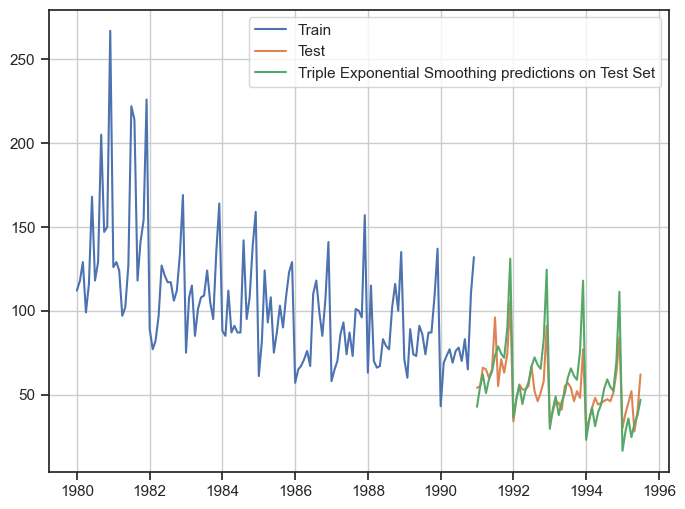

In [58]:
plt.plot(Train, label='Train')
plt.plot(Test, label='Test')
#plt.plot(model_SES_predict, label = 'Simple Exponential Smoothing predictions on Test Set')
#plt.plot(model_DES_predict, label = 'Double Exponential Smoothing predictions on Test Set')
plt.plot(model_HW_predict, label = 'Triple Exponential Smoothing predictions on Test Set')
plt.legend()
plt.grid()
plt.show()

### Naive Model

In [59]:
NaiveModel_train = Train.copy()
NaiveModel_test = Test.copy()

In [60]:
NaiveModel_test['naive'] = np.asarray(Train['Rose'])[len(np.asarray(Train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

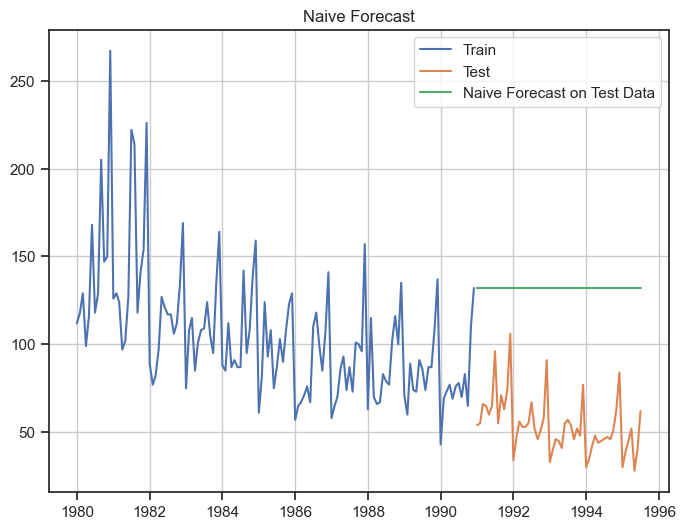

In [61]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [95]:
# RMSE of Naive_model

In [62]:
print('Naive_model :',mean_squared_error(Test['Rose'], NaiveModel_test['naive'], squared = False))

Naive_model : 79.67247513968435


In [63]:
resultsDF4 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test['Rose'], NaiveModel_test['naive'], squared = False)}, index=['Naive_model'])

In [64]:
resultsDF = pd.concat([resultsDF1, resultsDF2, resultsDF3, resultsDF4])
resultsDF

,Test_RMSE
SES_model,36.748402
DES_model,15.255480
Hw_model,14.216694
Naive_model,79.672475


## SimpleAverage model

In [66]:
SimpleAverage_train = Train.copy()
SimpleAverage_test = Test.copy()

In [67]:
SimpleAverage_test['mean_forecast'] = Train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


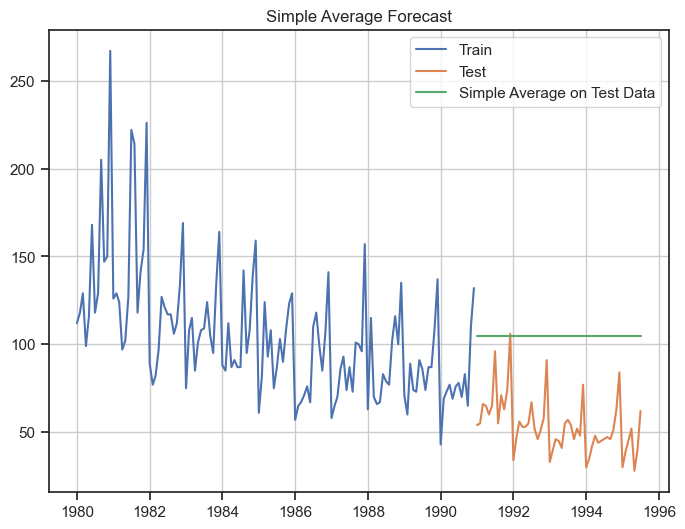

In [68]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [69]:
# RMSE of SimpleAverage_model

In [70]:
print('Simple_Average :',mean_squared_error(Test['Rose'], SimpleAverage_test['mean_forecast'], squared = False))

Simple_Average : 53.413297631071146


In [71]:
resultsDF5 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test['Rose'], SimpleAverage_test['mean_forecast'], squared = False)}, index=['SimpleAverage_model'])

In [72]:
resultsDF = pd.concat([resultsDF1, resultsDF2, resultsDF3, resultsDF4, resultsDF5])
resultsDF

,Test_RMSE
SES_model,36.748402
DES_model,15.255480
Hw_model,14.216694
Naive_model,79.672475
SimpleAverage_model,53.413298


### LinearRegression

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
len(Train)

132

In [75]:
len(Test)

55

In [76]:
train_time = [i+1 for i in range(len(Train))]
test_time = [i+133 for i in range(len(Test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [77]:
LinearRegression_train = Train.copy()
LinearRegression_test = Test.copy()

In [78]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [79]:
model_LR = LinearRegression()

In [80]:
model_LR.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

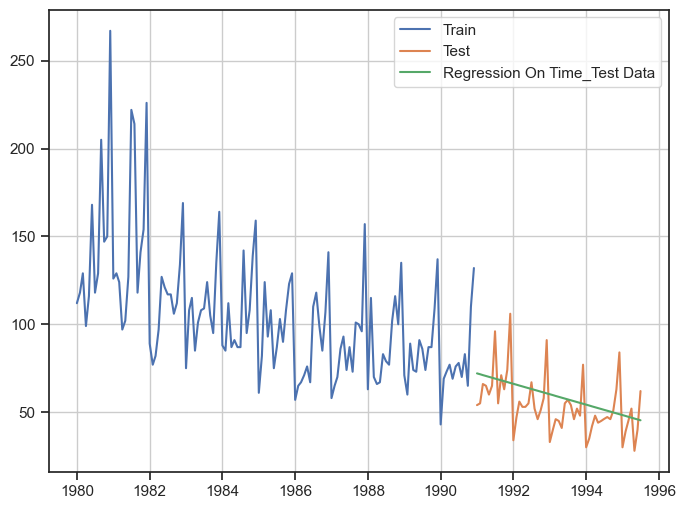

In [81]:
train_predictions_model         = model_LR.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model

test_predictions_model         = model_LR.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model

plt.plot(Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [82]:
print('LinearRegression :',mean_squared_error(Test['Rose'], test_predictions_model, squared = False))

LinearRegression : 15.255491586145185


In [83]:
resultsDF6 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test['Rose'], test_predictions_model, squared = False)}, index=['LinearReg_model'])

In [84]:
resultsDF = pd.concat([resultsDF1, resultsDF2, resultsDF3, resultsDF4, resultsDF5, resultsDF6])
resultsDF

,Test_RMSE
SES_model,36.748402
DES_model,15.255480
Hw_model,14.216694
Naive_model,79.672475
SimpleAverage_model,53.413298
LinearReg_model,15.255492


In [85]:
# Checking Stationarity

H0 = Time series is not stationary <br>
Ha = Time series is stationary

In [86]:
from statsmodels.tsa.stattools import adfuller

In [87]:
Rose_ts = df['Rose']

In [88]:
dftest = adfuller(Rose_ts)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.881
DF test p-value is 0.3411


In [89]:
## Making the data stationary

In [90]:
test_stat = df['Rose'].diff().dropna()

In [91]:
test_stat1 = adfuller(test_stat)#python implementation of dicky fuller test 
test_stat1
print('DF test statistic is %3.3f' %test_stat1[0])
print('DF test p-value is %1.4f' %test_stat1[1])

DF test statistic is -8.045
DF test p-value is 0.0000


## ARIMA

In [92]:
p = range(1, 4)
q = range(1, 4)
d = range(0, 2)

In [93]:
import itertools

In [94]:
pdq = list(itertools.product(p, d, q))
pdq_seasonal = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [95]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [96]:
pdq_seasonal

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [97]:
from statsmodels.tsa.arima.model import ARIMA

In [98]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [108]:
for param in pdq:
    ARIMA_model = ARIMA(Train['Rose'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC._append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231902
ARIMA(2, 1, 0) - AIC:1298.611034160493
ARIMA(2, 1, 1) - AIC:1281.507862186858
ARIMA(2, 1, 2) - AIC:1281.8707222264393


In [109]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722


In [110]:
model_ARIMA = ARIMA(Train['Rose'],order = (2,1,3))
results_ARIMA = model_ARIMA.fit()

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [111]:
print(results_ARIMA.summary().tables[0])
print(results_ARIMA.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Tue, 28 May 2024   AIC                           1274.695
Time:                        13:04:47   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -20.035      0.000      -1.842      -1.514
ar.L2         -0.7291      0.084     -8.706      0.000      -0.893      -0.565
ma.L1          1.0444      0.618      1.691      0.0

In [112]:
#Calculating RMSE for best ARIMA model 

In [113]:
predicted_model_ARIMA = results_ARIMA.forecast(steps=len(Test))

In [114]:
#RMSE ARIMA model

In [115]:
print('ARIMA_model', mean_squared_error(Test.values,predicted_model_ARIMA.values, squared=False ))

ARIMA_model 36.764957321633325


In [116]:
resultsDF7 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test.values,predicted_model_ARIMA.values, squared=False )}, index=['ARIMA_model'])

In [117]:
resultsDF = pd.concat([resultsDF1, resultsDF2, resultsDF3, resultsDF4, resultsDF5, resultsDF6, resultsDF7])
resultsDF

,Test_RMSE
SES_model,36.748402
DES_model,15.255480
Hw_model,14.216694
Naive_model,79.672475
SimpleAverage_model,53.413298
LinearReg_model,15.255492
ARIMA_model,36.764957


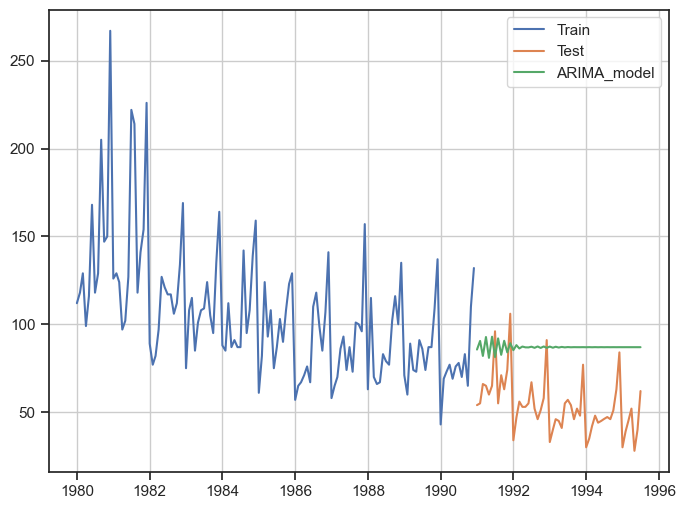

In [118]:
plt.plot(Train, label='Train')
plt.plot(Test, label='Test')
plt.plot(predicted_model_ARIMA, label = 'ARIMA_model')
plt.legend()
plt.grid()
plt.show()

## SARIMA model

In [119]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]

In [120]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [107]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=100)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.499626111386
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.707747182733
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.787094514912
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722267
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629514917
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426035388
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029545
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752787
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745055
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.438625374653
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.856412391344
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982632
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455189287285
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082628278
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

In [121]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC


In [122]:
model_SARIMAX = sm.tsa.statespace.SARIMAX(Train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMAX = model_SARIMAX.fit(maxiter=100)

In [123]:
print(results_SARIMAX.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Tue, 28 May 2024   AIC                           1041.656
Time:                                   13:05:09   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.152     -3.900      0.000      -0.892      -0.295
ma.L1         -0.1954   1036.241     -0.000

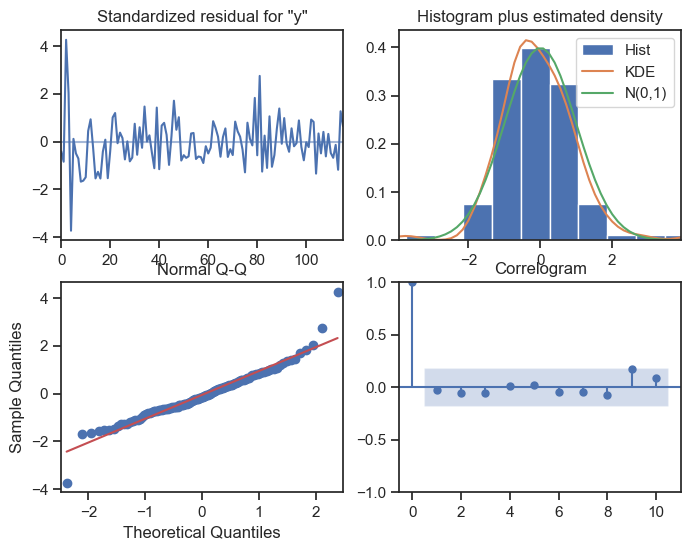

In [124]:
results_SARIMAX.plot_diagnostics()
plt.show()

In [125]:
predicted_SARIMA_6 = results_SARIMAX.get_forecast(steps=len(Test))

In [126]:
predicted_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.839539,18.849003,25.896172,99.782905
1,67.630328,19.300942,29.801178,105.459479
2,74.747998,19.413543,36.698152,112.797844
3,71.326712,19.476504,33.153464,109.499959
4,76.021772,19.484789,37.832287,114.211257


In [128]:
print('SARIMA_model :', mean_squared_error(Test['Rose'], predicted_SARIMA_6.predicted_mean, squared=False))

SARIMA_model : 26.08035740824899


In [129]:
resultsDF8 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test['Rose'], predicted_SARIMA_6.predicted_mean, squared=False)}, index=['SARIMA_model'])

In [130]:
resultsDF = pd.concat([resultsDF1, resultsDF2, resultsDF3, resultsDF4, resultsDF5, resultsDF6, resultsDF7, resultsDF8])
resultsDF

,Test_RMSE
SES_model,36.748402
DES_model,15.255480
Hw_model,14.216694
Naive_model,79.672475
SimpleAverage_model,53.413298
LinearReg_model,15.255492
ARIMA_model,36.764957
SARIMA_model,26.080357


## Building the most optimum model on the Full Data

In [131]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(1,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=100)
print(results_full_data_model.summary())

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -735.605
Date:                           Tue, 28 May 2024   AIC                           1487.210
Time:                                   13:06:13   BIC                           1512.343
Sample:                               01-01-1980   HQIC                          1497.408
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7940      0.064     12.330      0.000       0.668       0.920
ma.L1         -1.7364      0.095    -18.306

## Evaluate the model on the whole and predict 12 months into the future

In [132]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [133]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,49.746507,16.991248,16.444273,83.048740
1995-09-01,48.519134,17.018428,15.163629,81.874640
1995-10-01,52.245245,17.058041,18.812099,85.678391
1995-11-01,52.482123,17.108892,18.949312,86.014935
1995-12-01,70.455716,17.169471,36.804170,104.107261


In [134]:
print('Full_data_SARIMA_model_RMSE :', mean_squared_error(df['Rose'], results_full_data_model.fittedvalues, squared=False))

Full_data_SARIMA_model_RMSE : 34.922319293213754


In [135]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-07-01',end='1996-07-01', freq='M'))

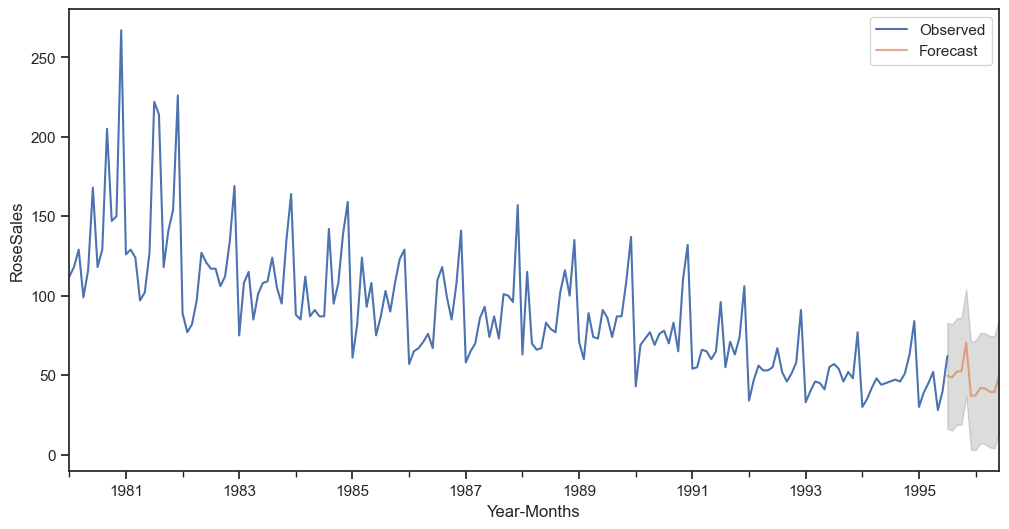

In [136]:
plt.figure(figsize=(12,6))
axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RoseSales')
plt.legend(loc='best')
plt.show()

## Sparkling wine

In [137]:
dfs = pd.read_csv('Sparkling.csv', parse_dates=['YearMonth'], index_col='YearMonth')
dfs.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [138]:
dfs.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [139]:
dfs.isnull().sum()

Sparkling    0
dtype: int64

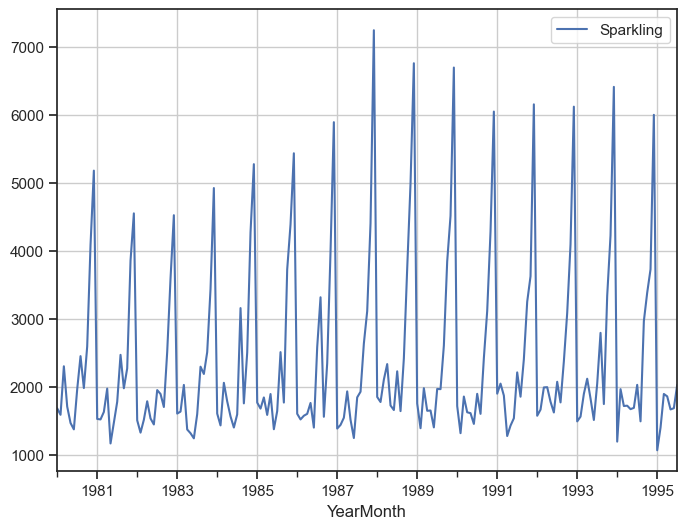

In [140]:
dfs.plot()
plt.grid()

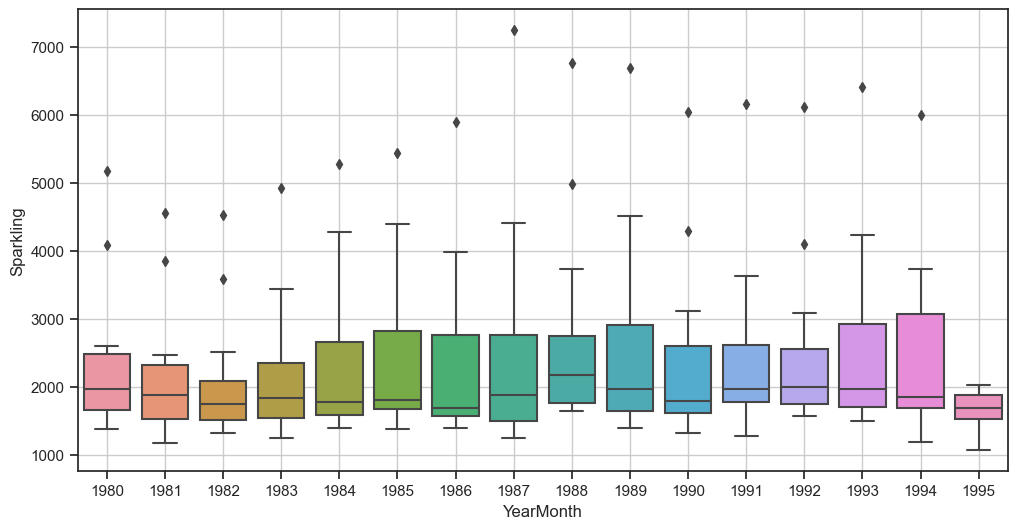

In [141]:
plt.figure(figsize=(12,6))
sns.boxplot(x=dfs.index.year, y=dfs['Sparkling']);
plt.grid()

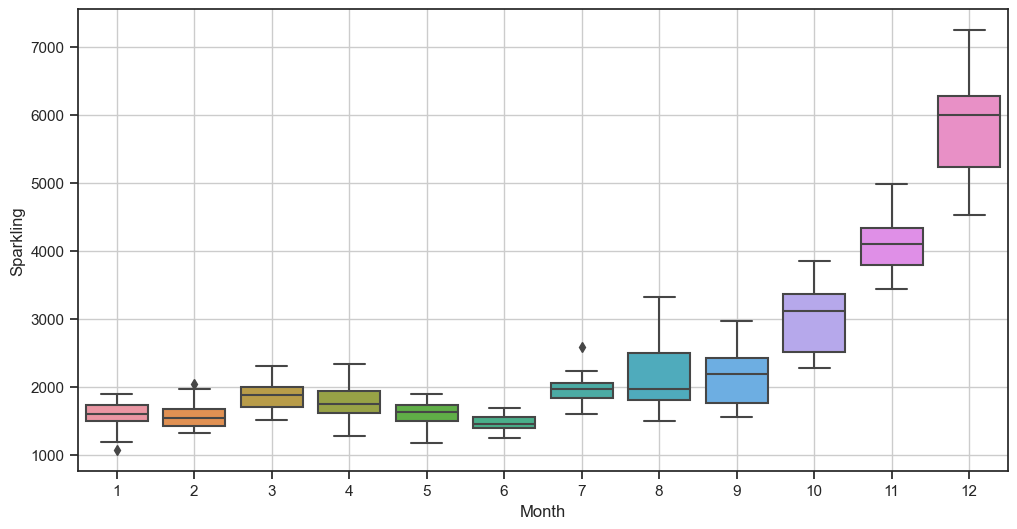

In [142]:
plt.figure(figsize=(12,6))
sns.boxplot(x=dfs.index.month, y=dfs['Sparkling']);
plt.xlabel('Month')
plt.grid()

## ECDF

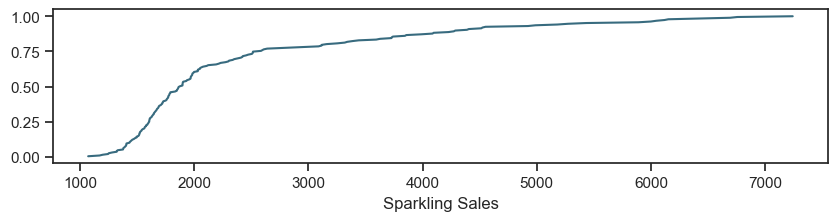

In [143]:
sns.set(style = "ticks")
c = '#386B7F'
plt.figure(figsize = (10, 2))
cdf = ECDF(dfs['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sparkling Sales');

## Decomposition

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

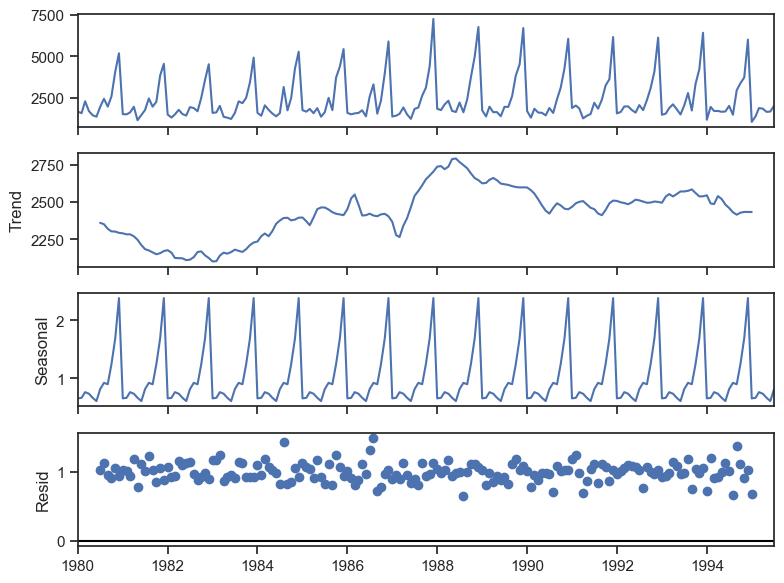

In [145]:
decomposition = seasonal_decompose(dfs, model='multiplicative')
rcParams['figure.figsize'] = 8, 6
decomposition.plot()
plt.show()

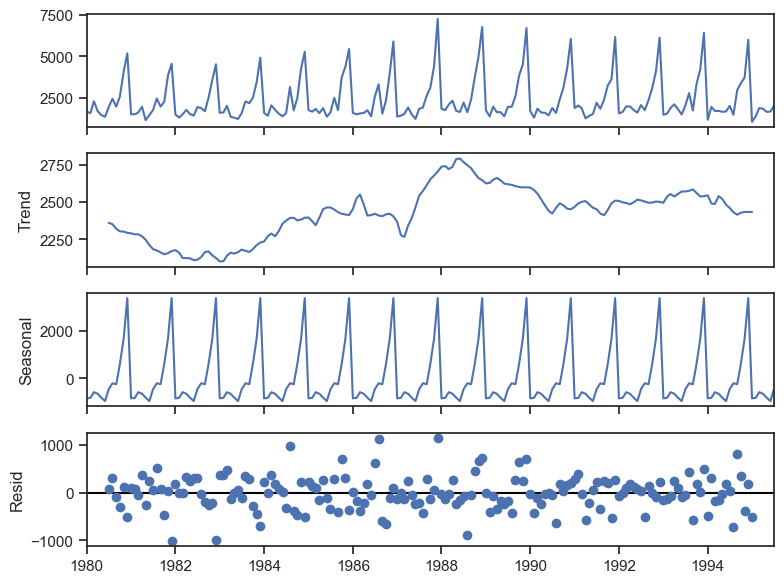

In [146]:
decomposition = seasonal_decompose(dfs, model='additive')
rcParams['figure.figsize'] = 8, 6
decomposition.plot()
plt.show()

## Splitting the data

In [147]:
from IPython.display import display

In [148]:
Train = dfs[dfs.index < '1991-01-01']
Test = dfs[dfs.index >= '1991-01-01']

In [149]:
display(Train)

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116


In [150]:
display(Test)

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432
1991-06-01,1540
1991-07-01,2214
1991-08-01,1857
1991-09-01,2408


### Simple Exponential Smoothing

In [151]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt
from sklearn.metrics import mean_squared_error

In [152]:
modelS_SES = SimpleExpSmoothing(Train, initialization_method='estimated')

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [153]:
modelS_SES_fit = modelS_SES.fit(optimized=True)

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [154]:
modelS_SES_fit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [155]:
modelS_SES_predict = modelS_SES_fit.forecast(steps=len(Test))

In [156]:
modelS_SES_predict

1991-01-01    2804.675124
1991-02-01    2804.675124
1991-03-01    2804.675124
1991-04-01    2804.675124
1991-05-01    2804.675124
1991-06-01    2804.675124
1991-07-01    2804.675124
1991-08-01    2804.675124
1991-09-01    2804.675124
1991-10-01    2804.675124
1991-11-01    2804.675124
1991-12-01    2804.675124
1992-01-01    2804.675124
1992-02-01    2804.675124
1992-03-01    2804.675124
1992-04-01    2804.675124
1992-05-01    2804.675124
1992-06-01    2804.675124
1992-07-01    2804.675124
1992-08-01    2804.675124
1992-09-01    2804.675124
1992-10-01    2804.675124
1992-11-01    2804.675124
1992-12-01    2804.675124
1993-01-01    2804.675124
1993-02-01    2804.675124
1993-03-01    2804.675124
1993-04-01    2804.675124
1993-05-01    2804.675124
1993-06-01    2804.675124
1993-07-01    2804.675124
1993-08-01    2804.675124
1993-09-01    2804.675124
1993-10-01    2804.675124
1993-11-01    2804.675124
1993-12-01    2804.675124
1994-01-01    2804.675124
1994-02-01    2804.675124
1994-03-01  

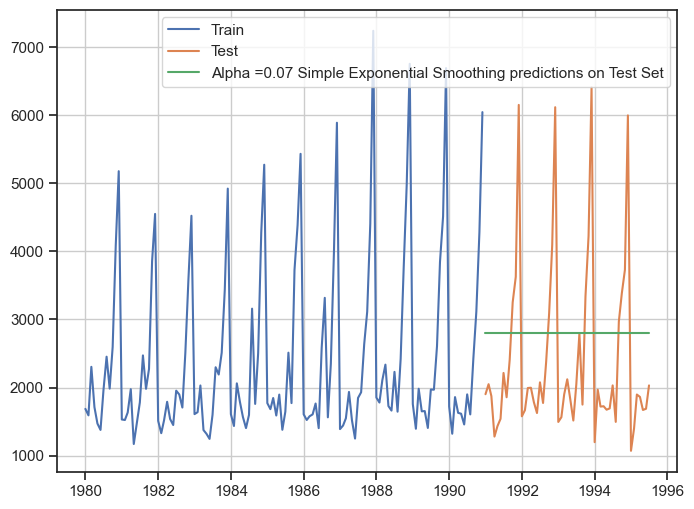

In [157]:
plt.plot(Train, label='Train')
plt.plot(Test, label='Test')
plt.plot(modelS_SES_predict, label = 'Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')
plt.legend()
plt.grid()
plt.show()

In [158]:
# RMSE value for SES model

In [159]:
print('SES_Sparkling_model :', mean_squared_error(Test.values, modelS_SES_predict.values, squared=False))

SES_Sparkling_model : 1338.0083844916467


In [160]:
resultsDF1 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test.values, modelS_SES_predict.values, squared=False)}, index=['SES_Sparkling_model'])
resultsDF1

,Test_RMSE
SES_Sparkling_model,1338.008384


### Double exponential smoothing

In [161]:
modelS_DES = Holt(Train, initialization_method='estimated')

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [162]:
modelS_DES_fit = modelS_DES.fit(optimized=True)

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [163]:
modelS_DES_fit.params

{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999991,
 'initial_trend': 74.87272727272739,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [164]:
modelS_DES_predict = modelS_DES_fit.forecast(steps=len(Test))

In [165]:
modelS_DES_predict

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

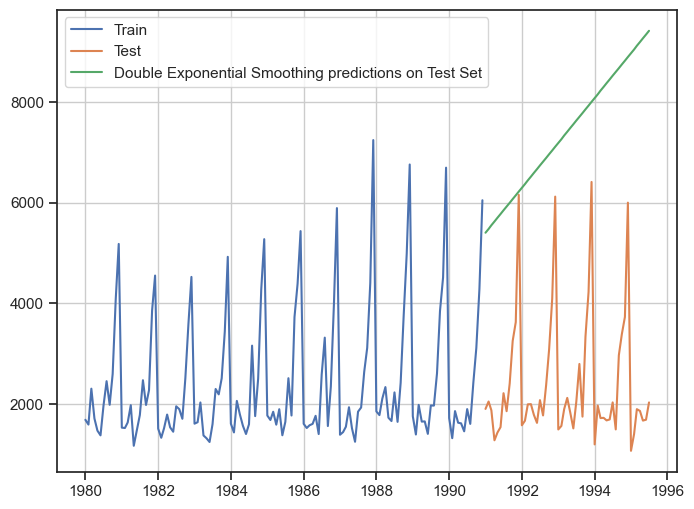

In [166]:
plt.plot(Train, label='Train')
plt.plot(Test, label='Test')
plt.plot(modelS_DES_predict, label = 'Double Exponential Smoothing predictions on Test Set')
plt.legend()
plt.grid()
plt.show()

In [167]:
# RMSE value for DES model

In [168]:
print('DES_Sparkling_model :', mean_squared_error(Test.values, modelS_DES_predict.values, squared=False))

DES_Sparkling_model : 5291.8798332269125


In [169]:
resultsDF2 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test.values, modelS_DES_predict.values, squared=False)}, index=['DES_Sparkling_model'])

In [170]:
resultsDF = pd.concat([resultsDF1, resultsDF2])
resultsDF

,Test_RMSE
SES_Sparkling_model,1338.008384
DES_Sparkling_model,5291.879833


### Triple exponential smoothing

In [171]:
modelS_TES = ExponentialSmoothing(Train, trend='additive', seasonal='additive', initialization_method='estimated')

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [172]:
modelS_TES_fit = modelS_TES.fit(optimized=True)

In [173]:
modelS_TES_fit.params

{'smoothing_level': 0.11127227248079453,
 'smoothing_trend': 0.012360804305088534,
 'smoothing_seasonal': 0.46071766688111543,
 'damping_trend': nan,
 'initial_level': 2356.577980956387,
 'initial_trend': -0.10243675533021725,
 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
        -808.42473284, -815.34991402, -384.23065038,   72.99484403,
        -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [174]:
modelS_TES_predict = modelS_TES_fit.forecast(steps=len(Test))
modelS_TES_predict

1991-01-01    1490.402890
1991-02-01    1204.525152
1991-03-01    1688.734182
1991-04-01    1551.226125
1991-05-01    1461.197883
1991-06-01    1278.646707
1991-07-01    1804.885616
1991-08-01    1678.955032
1991-09-01    2315.373126
1991-10-01    3224.976222
1991-11-01    4299.301434
1991-12-01    6410.712237
1992-01-01    1482.829908
1992-02-01    1196.952170
1992-03-01    1681.161200
1992-04-01    1543.653143
1992-05-01    1453.624901
1992-06-01    1271.073725
1992-07-01    1797.312634
1992-08-01    1671.382050
1992-09-01    2307.800144
1992-10-01    3217.403240
1992-11-01    4291.728452
1992-12-01    6403.139255
1993-01-01    1475.256926
1993-02-01    1189.379188
1993-03-01    1673.588218
1993-04-01    1536.080160
1993-05-01    1446.051919
1993-06-01    1263.500743
1993-07-01    1789.739652
1993-08-01    1663.809068
1993-09-01    2300.227162
1993-10-01    3209.830258
1993-11-01    4284.155470
1993-12-01    6395.566273
1994-01-01    1467.683944
1994-02-01    1181.806206
1994-03-01  

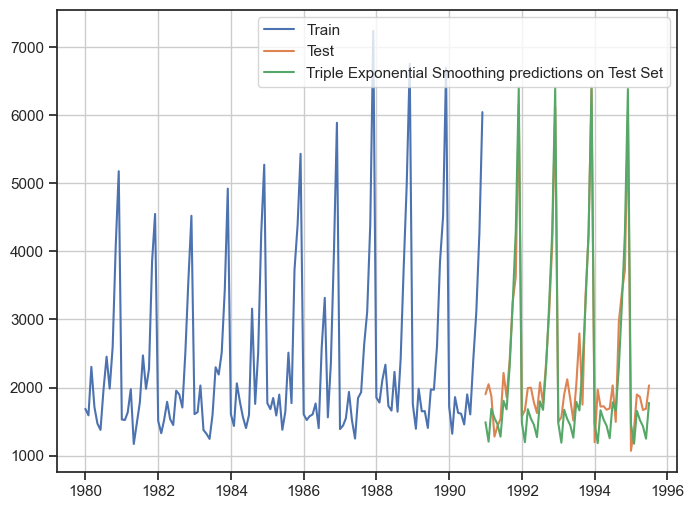

In [175]:
plt.plot(Train, label='Train')
plt.plot(Test, label='Test')
plt.plot(modelS_TES_predict, label = 'Triple Exponential Smoothing predictions on Test Set')
plt.legend()
plt.grid()
plt.show()

In [176]:
# RMSE value for TES model

In [177]:
print('TES_Sparkling_model :', mean_squared_error(Test.values, modelS_TES_predict.values, squared=False))

TES_Sparkling_model : 378.95102286703


In [178]:
resultsDF3 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test.values, modelS_TES_predict.values, squared=False)}, index=['TES_Sparkling_model'])

In [179]:
resultsDF = pd.concat([resultsDF1, resultsDF2, resultsDF3])
resultsDF

,Test_RMSE
SES_Sparkling_model,1338.008384
DES_Sparkling_model,5291.879833
TES_Sparkling_model,378.951023


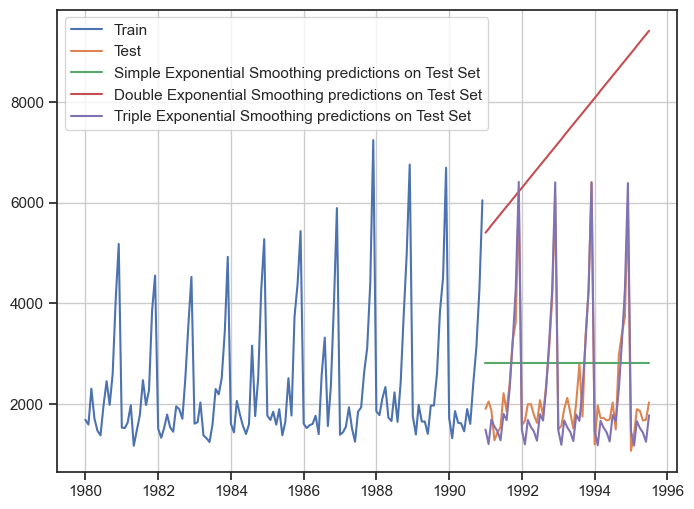

In [180]:
plt.plot(Train, label='Train')
plt.plot(Test, label='Test')
plt.plot(modelS_SES_predict, label = 'Simple Exponential Smoothing predictions on Test Set')
plt.plot(modelS_DES_predict, label = 'Double Exponential Smoothing predictions on Test Set')
plt.plot(modelS_TES_predict, label = 'Triple Exponential Smoothing predictions on Test Set')
plt.legend()
plt.grid()
plt.show()

### Naive Model

In [181]:
NaiveModel_train = Train.copy()
NaiveModel_test = Test.copy()

In [182]:
NaiveModel_test['naive'] = np.asarray(Train['Sparkling'])[len(np.asarray(Train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

In [183]:
#RMSE value

In [184]:
print('Naive_model :',mean_squared_error(Test['Sparkling'], NaiveModel_test['naive'], squared = False))

Naive_model : 3864.2793518443914


In [185]:
resultsDF4 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test['Sparkling'], NaiveModel_test['naive'], squared = False)}, index=['Naive_Sparkling_model'])

In [186]:
resultsDF = pd.concat([resultsDF1, resultsDF2, resultsDF3, resultsDF4])
resultsDF

,Test_RMSE
SES_Sparkling_model,1338.008384
DES_Sparkling_model,5291.879833
TES_Sparkling_model,378.951023
Naive_Sparkling_model,3864.279352


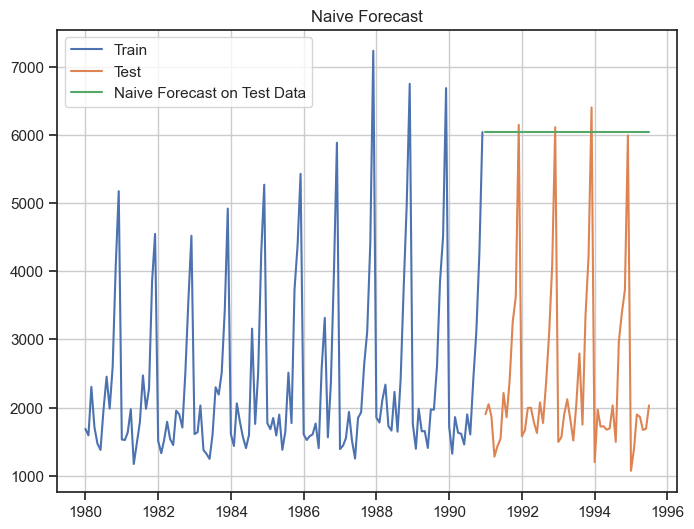

In [187]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(Test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### SimpleAverage model

In [188]:
SimpleAverage_train = Train.copy()
SimpleAverage_test = Test.copy()

In [189]:
SimpleAverage_test['mean_forecast'] = Train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


In [190]:
#RMSE value

In [191]:
print('SimpleAverage_model :',mean_squared_error(Test['Sparkling'], SimpleAverage_test['mean_forecast'], squared = False))

SimpleAverage_model : 1275.0818036965309


In [192]:
resultsDF5 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test['Sparkling'], SimpleAverage_test['mean_forecast'], squared = False)}, index=['SimpleAvg_Sparkling_model'])

In [193]:
resultsDF = pd.concat([resultsDF1, resultsDF2, resultsDF3, resultsDF4, resultsDF5])
resultsDF

,Test_RMSE
SES_Sparkling_model,1338.008384
DES_Sparkling_model,5291.879833
TES_Sparkling_model,378.951023
Naive_Sparkling_model,3864.279352
SimpleAvg_Sparkling_model,1275.081804


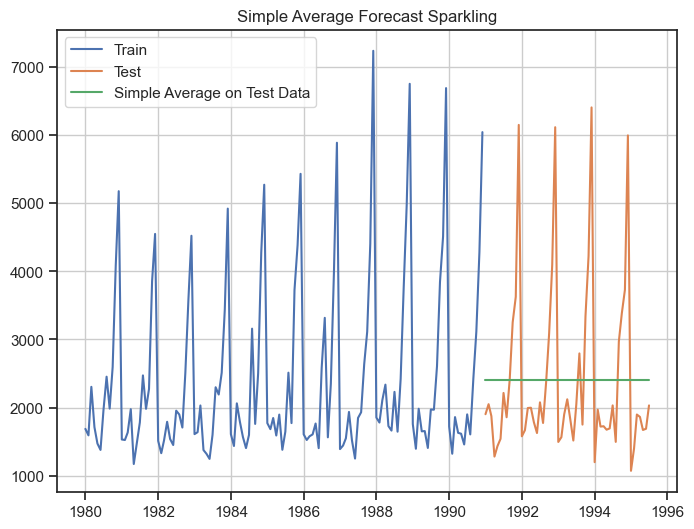

In [194]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast Sparkling")
plt.grid();

### LinearRegression

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
len(Train)

132

In [197]:
len(Test)

55

In [198]:
train_time = [i+1 for i in range(len(Train))]
test_time = [i+133 for i in range(len(Test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [199]:
LinearRegression_train = Train.copy()
LinearRegression_test = Test.copy()

In [200]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [201]:
modelS_LR = LinearRegression()

In [202]:
modelS_LR.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

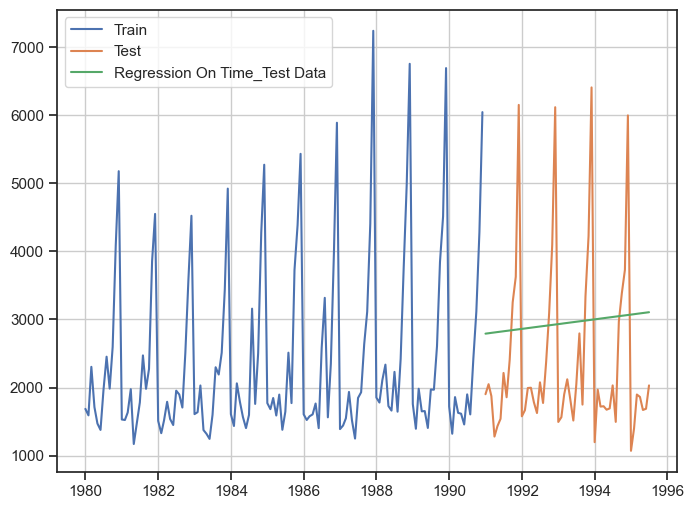

In [203]:
train_predictions_model         = modelS_LR.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model

test_predictions_model         = modelS_LR.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model

plt.plot(Train['Sparkling'], label='Train')
plt.plot(Test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [204]:
# RMSE value

In [205]:
print('LinearRegression :',mean_squared_error(Test['Sparkling'], test_predictions_model, squared = False))

LinearRegression : 1389.135174897992


In [206]:
resultsDF6 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test['Sparkling'], test_predictions_model, squared = False)}, index=['LinearReg_Sparkling_model'])

In [207]:
resultsDF = pd.concat([resultsDF1, resultsDF2, resultsDF3, resultsDF4, resultsDF5, resultsDF6])
resultsDF

,Test_RMSE
SES_Sparkling_model,1338.008384
DES_Sparkling_model,5291.879833
TES_Sparkling_model,378.951023
Naive_Sparkling_model,3864.279352
SimpleAvg_Sparkling_model,1275.081804
LinearReg_Sparkling_model,1389.135175


### Checking for Stationarity

In [208]:
from statsmodels.tsa.stattools import adfuller

H0 = Time series is not stationary <br>
Ha = Time series is stationary

In [209]:
Spark_ts = dfs['Sparkling']

In [210]:
dfstest = adfuller(Spark_ts)#python implementation of dicky fuller test 
dfstest
print('DF test statistic is %3.3f' %dfstest[0])
print('DF test p-value is %1.4f' %dfstest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


In [211]:
# Making the data stationary

In [212]:
test_stat = dfs['Sparkling'].diff().dropna()

In [213]:
test_stat1 = adfuller(test_stat)#python implementation of dicky fuller test 
test_stat1
print('DF test statistic is %3.3f' %test_stat1[0])
print('DF test p-value is %1.4f' %test_stat1[1])

DF test statistic is -45.050
DF test p-value is 0.0000


### ARIMA

In [214]:
p = range(1, 4)
q = range(1, 4)
d = range(0, 2)

In [215]:
import itertools

In [216]:
pdq = list(itertools.product(p, d, q))
pdq_seasonal = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [217]:
from statsmodels.tsa.arima.model import ARIMA

In [218]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [220]:
for param in pdq:
    ARIMA_model = ARIMA(Train['Sparkling'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC._append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(1, 0, 1) - AIC:2246.0053997283558
ARIMA(1, 0, 2) - AIC:2246.9357004523467
ARIMA(1, 0, 3) - AIC:2242.106123411827
ARIMA(1, 1, 1) - AIC:2235.755094673378
ARIMA(1, 1, 2) - AIC:2234.527200451783
ARIMA(1, 1, 3) - AIC:2235.607813201297
ARIMA(2, 0, 1) - AIC:2236.590860200231
ARIMA(2, 0, 2) - AIC:2248.2772806942307


C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(2, 0, 3) - AIC:2205.7133668974457
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092125299816


C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

ARIMA(2, 1, 3) - AIC:2232.8807090462965
ARIMA(3, 0, 1) - AIC:2248.5628041830105
ARIMA(3, 0, 2) - AIC:2235.1643741267244


C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

ARIMA(3, 0, 3) - AIC:2209.201285697689
ARIMA(3, 1, 1) - AIC:2235.4989261087767
ARIMA(3, 1, 2) - AIC:2230.7759852552135
ARIMA(3, 1, 3) - AIC:2221.436801003937


C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [221]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
8,"(2, 0, 3)",2205.713367
14,"(3, 0, 3)",2209.201286
10,"(2, 1, 2)",2213.509213
17,"(3, 1, 3)",2221.436801
16,"(3, 1, 2)",2230.775985


In [222]:
model_ARIMA = ARIMA(Train['Sparkling'],order = (2,0,3))
results_ARIMA = model_ARIMA.fit()

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [223]:
print(results_ARIMA.summary().tables[0])
print(results_ARIMA.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1095.857
Date:                Tue, 28 May 2024   AIC                           2205.713
Time:                        13:07:06   BIC                           2225.893
Sample:                    01-01-1980   HQIC                          2213.913
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2403.7136    129.874     18.508      0.000    2149.164    2658.263
ar.L1          1.7078      0.047     36.250      0.000       1.615       1.800
ar.L2         -0.9715      0.047    -20.606      0.0

In [224]:
predicted_model_ARIMA = results_ARIMA.forecast(steps=len(Test))

In [225]:
print('ARIMA_model', mean_squared_error(Test.values,predicted_model_ARIMA.values, squared=False ))

ARIMA_model 1027.4509447272537


In [226]:
resultsDF7 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test.values,predicted_model_ARIMA.values, squared=False )}, index=['ARIMA_Sparkling_model'])

In [227]:
resultsDF = pd.concat([resultsDF1, resultsDF2, resultsDF3, resultsDF4, resultsDF5, resultsDF6, resultsDF7])
resultsDF

,Test_RMSE
SES_Sparkling_model,1338.008384
DES_Sparkling_model,5291.879833
TES_Sparkling_model,378.951023
Naive_Sparkling_model,3864.279352
SimpleAvg_Sparkling_model,1275.081804
LinearReg_Sparkling_model,1389.135175
ARIMA_Sparkling_model,1027.450945


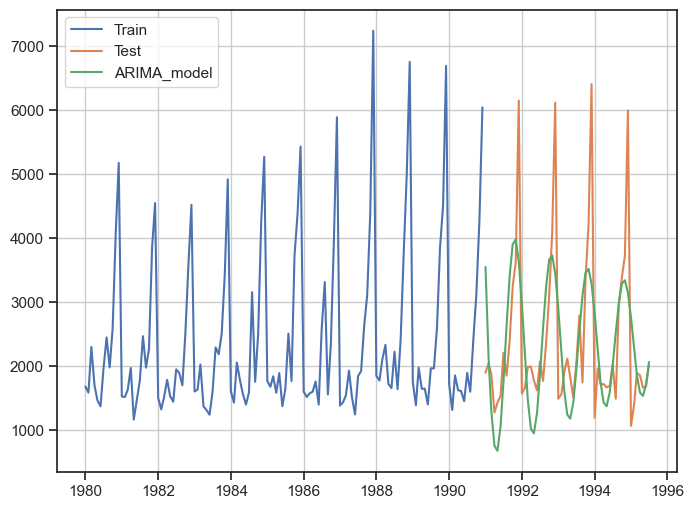

In [228]:
plt.plot(Train, label='Train')
plt.plot(Test, label='Test')
plt.plot(predicted_model_ARIMA, label = 'ARIMA_model')
plt.legend()
plt.grid()
plt.show()

### SARIMA

In [229]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]

In [230]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [232]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=100)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC._append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844612
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640239188
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389667
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.210873579223
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158609058
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920815
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850585
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566314
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572729112
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881837984
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193765214
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144563095
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195417734
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245089918774
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018850777456
SARIMA(0, 1, 

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [233]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.929654
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121565
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [234]:
model_SARIMAX = sm.tsa.statespace.SARIMAX(Train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMAX = model_SARIMAX.fit(maxiter=100)

In [235]:
print(results_SARIMAX.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Tue, 28 May 2024   AIC                           1555.584
Time:                                    13:07:57   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

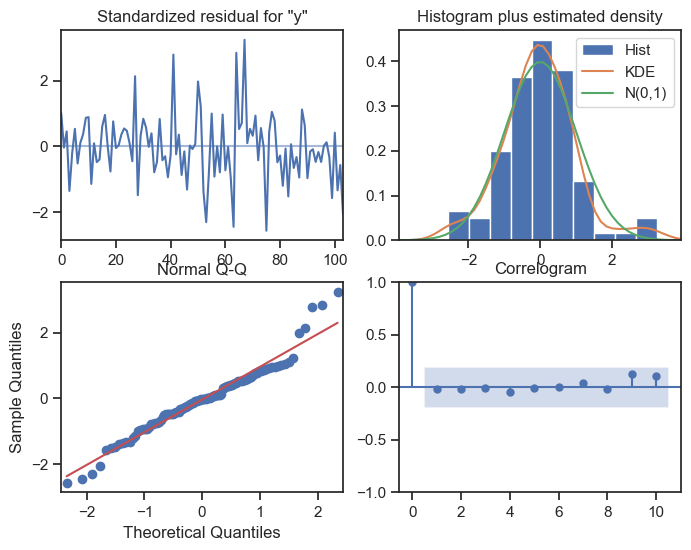

In [236]:
results_SARIMAX.plot_diagnostics()
plt.show()

In [237]:
predicted_SARIMA_12 = results_SARIMAX.get_forecast(steps=len(Test))

In [238]:
predicted_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.401836,388.343548,566.262469,2088.541204
1,1315.130854,402.006029,527.213517,2103.048192
2,1621.604437,401.999634,833.699633,2409.509241
3,1598.885768,407.237048,800.715821,2397.055714
4,1392.704816,407.966962,593.104263,2192.305369


In [239]:
print('SARIMA_model :', mean_squared_error(Test['Sparkling'], predicted_SARIMA_12.predicted_mean, squared=False))

SARIMA_model : 528.6013372351356


In [240]:
resultsDF8 = pd.DataFrame({'Test_RMSE':mean_squared_error(Test['Sparkling'], predicted_SARIMA_12.predicted_mean, squared=False)}, index=['SARIMA_Sparkling_model'])

In [241]:
resultsDF = pd.concat([resultsDF1, resultsDF2, resultsDF3, resultsDF4, resultsDF5, resultsDF6, resultsDF7, resultsDF8])
resultsDF

,Test_RMSE
SES_Sparkling_model,1338.008384
DES_Sparkling_model,5291.879833
TES_Sparkling_model,378.951023
Naive_Sparkling_model,3864.279352
SimpleAvg_Sparkling_model,1275.081804
LinearReg_Sparkling_model,1389.135175
ARIMA_Sparkling_model,1027.450945
SARIMA_Sparkling_model,528.601337


### Building the most optimum model on the Full Data

In [242]:
full_data_model = sm.tsa.statespace.SARIMAX(dfs['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=100)
print(results_full_data_model.summary())

C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sajiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Tue, 28 May 2024   AIC                           2360.827
Time:                                    13:08:15   BIC                           2382.309
Sample:                                01-01-1980   HQIC                          2369.551
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6609      0.242     -2.733      0.006      -1.135      -0.187
ma.L1         -0.2739      0.200   

### Evaluate the model on the whole and predict 12 months into the future

In [243]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [244]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1836.348248,379.706641,1092.136908,2580.559589
1995-09-01,2489.610492,384.470350,1736.062454,3243.158531
1995-10-01,3324.582756,384.576066,2570.827517,4078.337995
1995-11-01,4020.204576,386.333939,3263.003971,4777.405182
1995-12-01,6289.972886,386.388545,5532.665253,7047.280518


In [245]:
print('Full_data_SARIMA_model_RMSE :', mean_squared_error(dfs['Sparkling'], results_full_data_model.fittedvalues, squared=False))

Full_data_SARIMA_model_RMSE : 539.9815016693251


In [246]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-07-01',end='1996-07-01', freq='M'))

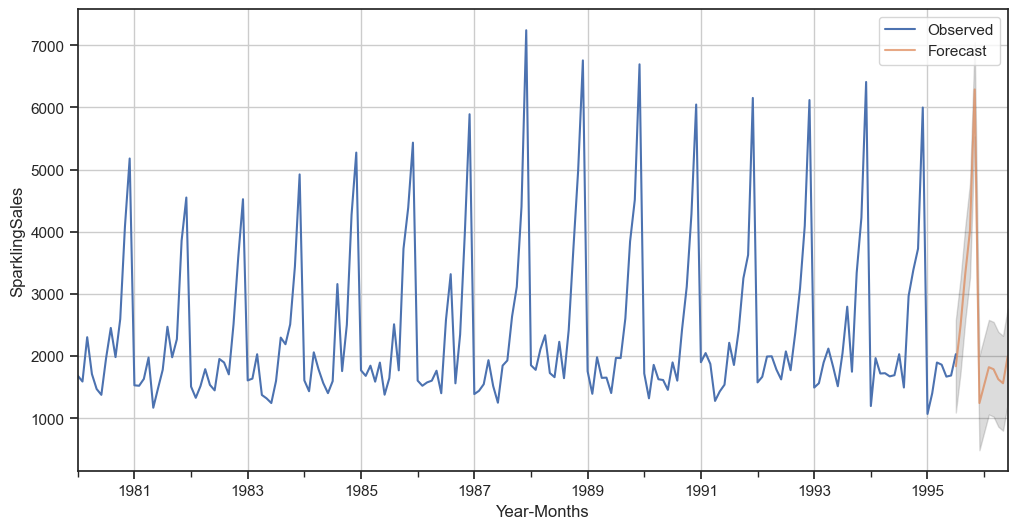

In [247]:
plt.figure(figsize=(12,6))
axis = dfs['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SparklingSales')
plt.legend(loc='best')
plt.grid()
plt.show()